# PROBLEM STATEMENT
### Dream Housing Finance company deals in all home Loans:

## Loan prediction practice problem
Company wants to automate the loan eligibility process(real time) based on customer detail provided while filling online application form.

### Data information
         *Nothing ever becomes real till it is experienced.*

In [80]:
# importing libraries used in performing machine learning tasks

import pandas as pd #linear algebra
import numpy as np # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # used to plot the graph
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline

# importing model Algorithms/classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC #SUpport vector MACHINE

#importing performance Metrics and  for the check the error and accuracy of the model

from sklearn import metrics
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score,average_precision_score, precision_score, confusion_matrix, classification_report


from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold  # to split the data into two parts
from sklearn.model_selection import KFold, cross_val_score  # use for K- fold cross validation
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV  # for tuning parameter

#importing warnings
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime

In [81]:
train=pd.read_csv("Downloads/DATASETS/LOAN PREDICTION ANALYTICS VIDHYA/train.csv")
test=pd.read_csv("Downloads/DATASETS/LOAN PREDICTION ANALYTICS VIDHYA/test.csv")

### Data Understanding

In [82]:
train.head()
print(train.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [83]:
print(test.head())
4  

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN     

4

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [85]:
#copying original dataset
train_original=train.copy()
test_original=test.copy()

In [45]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Data Explorative Analysis

#### Dealing and Detecting with Missing data

In [86]:
#total missing data per category
#train.isna().sum()


print(test.isna().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [87]:
#Gender imputation of missing
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)

In [88]:
#Married imputation/dealing with missing data
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)

In [89]:
#self_employed imputation of missing data
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)

In [90]:
#Depedents imputation of missing data
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)

In [91]:
#lOAN AMOUNT imputation of missing data
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)


In [92]:
#lOAN AMOUNT_term imputation of missing data
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(),inplace=True)

test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(),inplace=True)

In [93]:
#Credit_History imputation of missing data
train['Credit_History'].fillna(train['Credit_History'].median(),inplace=True)
test['Credit_History'].fillna(test['Credit_History'].median(),inplace=True)

In [94]:
#total missing data per category
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [95]:
#total missing data per category
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Data Visualization and Analysis

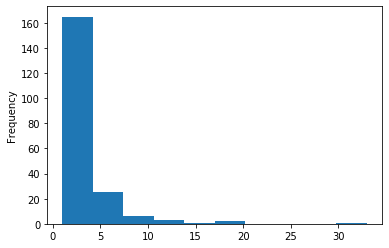

In [96]:
train['LoanAmount'].value_counts().plot.hist()


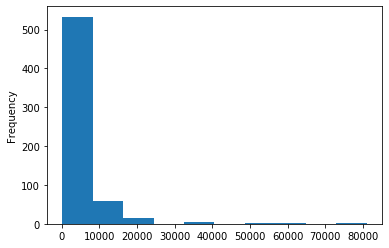

In [97]:
train['ApplicantIncome'].plot.hist()

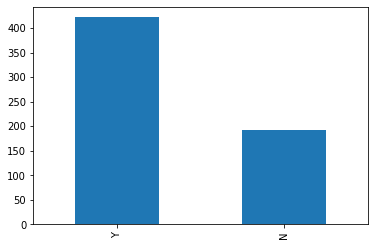

In [98]:
train['Loan_Status'].value_counts().plot.bar()
### Most customers got the loan

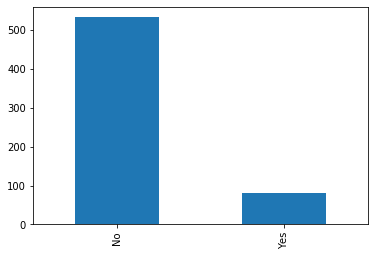

In [99]:
train['Self_Employed'].value_counts().plot.bar()


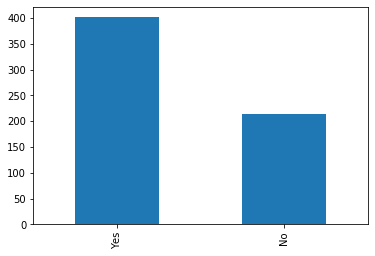

In [100]:
train['Married'].value_counts().plot.bar()

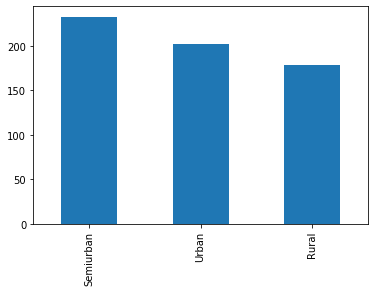

In [101]:

train['Property_Area'].value_counts().plot.bar()

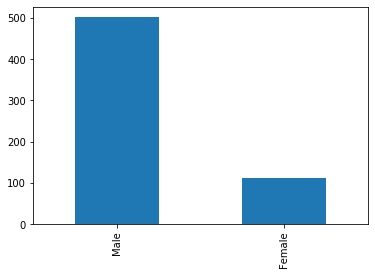

In [102]:
train['Gender'].value_counts().plot.bar()

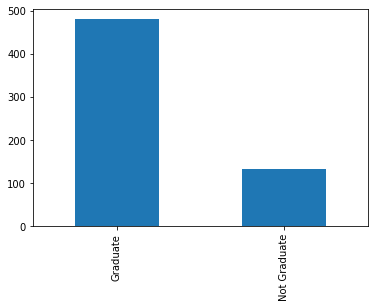

In [103]:
train['Education'].value_counts().plot.bar()

### BIVARIATE ANALYSIS WITH TARGET VARIABLE(LOAN_STATUS)

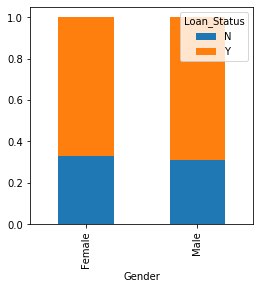

In [104]:
#stacked bar plot
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

##### Target variable VS Gender

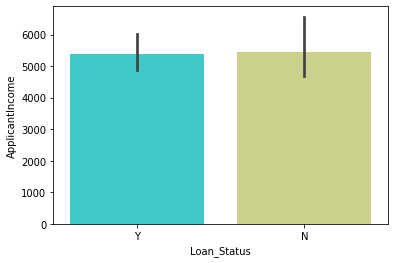

In [105]:
#train=pd.get_dummies(train)
#test=pd.get_dummies(test)
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=train,palette='rainbow')
plt.show()

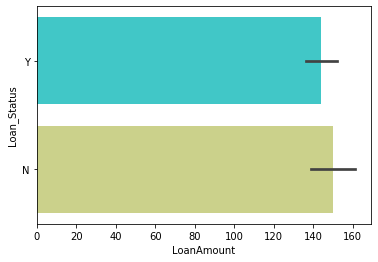

In [106]:
sns.barplot(x='LoanAmount',y='Loan_Status',data=train,palette='rainbow')
plt.show()

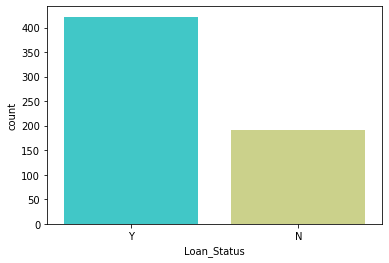

In [107]:
sns.countplot(train['Loan_Status'],data=train,palette='rainbow')

In [108]:
train=train.drop('Loan_ID',axis=1)
test=test.drop("Loan_ID",axis=1)


In [109]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### correlation between numerical variables

In [38]:
#

## Modelling

In [115]:
#X=train.iloc[:,:-1]
#y=train.iloc[:, -1]
X=train.drop('Loan_Status',1)
y=train.Loan_Status

KeyError: "['Loan_Status'] not found in axis"

In [116]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [117]:
X_train,X_tet,y_train,y_tet=train_test_split(X,y,test_size=0.2,random_state=0)
 
    #using logistic model
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
#predicting
predictions=model.predict(X_tet)

In [119]:
# accuracy
accuracy_score(y_tet,predictions)

0.8373983739837398

In [120]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [121]:
#predict test dataset
pred=model.predict(test)

In [122]:
#submission
submission=pd.read_csv("Downloads/DATASETS/LOAN PREDICTION ANALYTICS VIDHYA/sample_submission_49d68Cx.csv")

In [123]:
#filling columns loan id and loan status
submission['Loan_Status']=pred
submission['Loan_ID']=test_original['Loan_ID']

In [124]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(0,'Y',inplace=True)

In [125]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')